In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\administrator\anaconda3\lib\site-packages (2.3.1)
Note: you may need to restart the kernel to use updated packages.


# 2018016037 물리학과 조은강

In [27]:
#기초데이터
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

y_train=to_categorical(y)
y_test=to_categorical(y_test)

X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255


In [28]:
#Softmax Regression

In [29]:
net = models.Sequential()
net.add(layers.Dense(10, activation='softmax', input_shape=(28*28,))) # 입력(input_dim) 1개, 출력(units) 1개인 레이어를 생성
net.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
net.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4688 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2558 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2530 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

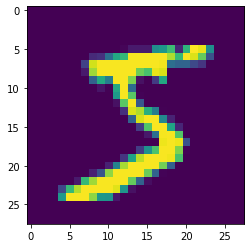

In [31]:
plt.imshow(X[0])


In [32]:
np.argmax(net.predict(X_train)[0])

5

In [33]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Support Vector Machine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

(X, y), (X_test, y_test) = mnist.load_data()

nsamples, nx, ny = X.shape
d2_X = X_train.reshape((nsamples,nx*ny))

nsamples, na, nb = X_test.shape
d2_X_test = X_test.reshape((nsamples,na*nb))

clf = SVC()
clf.set_params(kernel='rbf', probability=True).fit(d2_X[:1000,:], y[:1000])
preds1 = clf.predict(d2_X_test[:1000,:])
print("정확도:"+str(np.mean(preds1 == y_test[:1000])))

정확도:0.116


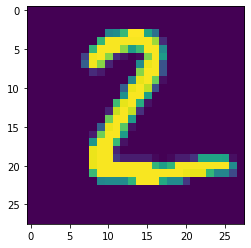

In [36]:
plt.imshow(X_test[1])

In [37]:
clf.predict(d2_X_test[:1000,:])[1]

2

In [38]:
#랜덤 포레스트
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100) 

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
clf.score(X_train,y_train)

0.9999833333333333

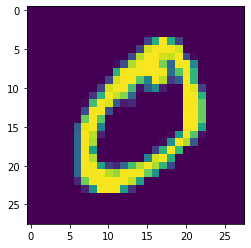

In [41]:
plt.imshow(X[1])

In [42]:
np.argmax(clf.predict(X_train)[1])

0